## Importing Modules

In [1]:
import gdown, glob, os, shutil, zipfile, time
import cv2
from tqdm import tqdm
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T

## Importing Data

In [2]:
csv_data = pd.read_csv('/content/drive/MyDrive/Research_Assistant/Skin_lesion/Data/ISIC2018_Task3_Test_NatureMedicine_AI_Interaction_Benefit.csv')

In [3]:
csv_data

,image_id,interaction_modality,prob_m_mal,prob_m_dx_akiec,prob_m_dx_bcc,prob_m_dx_bkl,prob_m_dx_df,prob_m_dx_mel,prob_m_dx_nv,prob_m_dx_vasc,...,user_dx_without_interaction_mel,user_dx_without_interaction_nv,user_dx_without_interaction_vasc,user_dx_with_interaction_akiec,user_dx_with_interaction_bcc,user_dx_with_interaction_bkl,user_dx_with_interaction_df,user_dx_with_interaction_mel,user_dx_with_interaction_nv,user_dx_with_interaction_vasc
0,ISIC_0034524,Malignancy Probability (AI),"3,6112365E-07","3,90293E-08","8,117796E-08","1,230346E-06","6,8621403E-06","2,409164E-07","0,9999885","3,0752137E-06",...,0,0,0,0,0,0,0,0,1,0
1,ISIC_0034525,Malignancy Probability (AI),"0,00063954331927","4,6960016E-05","8,363065E-05","8,099651E-05","0,82006663","0,00050895265","0,17920908","3,744718E-06",...,0,1,0,0,0,0,0,0,1,0
2,ISIC_0034525,Multiclass Probabilities (Crowd),"0,00063954331927","4,6960016E-05","8,363065E-05","8,099651E-05","0,82006663","0,00050895265","0,17920908","3,744718E-06",...,0,0,0,0,0,0,0,0,1,0
3,ISIC_0034526,CBIR (AI),"0,03198014359805","0,01575451","0,00038216423","0,935222","0,00071165885","0,01584347","0,032083057","3,17123E-06",...,1,0,0,0,0,5,0,0,0,0
4,ISIC_0034526,Malignancy Probability (AI),"0,03198014359805","0,01575451","0,00038216423","0,935222","0,00071165885","0,01584347","0,032083057","3,17123E-06",...,2,0,0,0,0,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,ISIC_0036063,Multiclass Probabilities (Crowd),"0,00011647981833","2,462065E-08","5,546823E-08","0,99959","3,896521E-05","0,00011639973","0,00025452144","5,914618E-08",...,1,0,0,0,0,1,0,0,0,0
3758,ISIC_0036064,CBIR (AI),"0,49492367485072","0,00091662013","0,026780669","0,12464325","0,004785853","0,4672264","0,19267568","0,18297152",...,2,0,0,0,1,0,0,2,0,0
3759,ISIC_0036064,Malignancy Probability (AI),"0,49492367485072","0,00091662013","0,026780669","0,12464325","0,004785853","0,4672264","0,19267568","0,18297152",...,4,0,0,0,4,1,0,4,0,0
3760,ISIC_0036064,Multiclass Probabilities (AI),"0,49492367485072","0,00091662013","0,026780669","0,12464325","0,004785853","0,4672264","0,19267568","0,18297152",...,6,0,0,0,0,0,0,7,0,0


In [4]:
metadata = pd.read_csv('/content/drive/MyDrive/Research_Assistant/Skin_lesion/Data/HAM10000_metadata')

In [5]:
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [32]:
#Moving splitted input data in a single file


# source1 = '/content/drive/MyDrive/Research_Assistant/Skin_lesion/Data/img_part_1/'
# source2 = '/content/drive/MyDrive/Research_Assistant/Skin_lesion/Data/img_part_2/'
# dest = '/content/drive/MyDrive/Research_Assistant/Skin_lesion/Data/Images/'

# for filename in glob.glob(source1+'*'):
#   filename_new = dest + filename.split('/')[-1]
#   shutil.move(filename, filename_new)

# for filename in glob.glob(source2+'*'):
#   filename_new = dest + filename.split('/')[-1]
#   shutil.move(filename, filename_new)

## Exploratory Data Analysis

In [33]:
dest = '/content/drive/MyDrive/Research_Assistant/Skin_lesion/Data/Images/'

imageid_path_dict = {filename.split('/')[-1].split('.')[0]: filename
                     for filename in glob.glob(dest+'*')}

lesion_type_dict = {
    'nv': 'Melanocytic_nevi',
    'mel': 'melanoma',
    'bkl': 'Benign_keratosis-like_lesions',
    'bcc': 'Basal_cell_carcinoma',
    'akiec': 'Actinic_keratoses',
    'vasc': 'Vascular_lesions',
    'df': 'Dermatofibroma'
}

lesion_danger = {
    'nv': 0, # 0 for benign
    'mel': 1, # 1 for malignant
    'bkl': 0, # 0 for benign
    'bcc': 1, # 1 for malignant
    'akiec': 1, # 1 for malignant
    'vasc': 0,
    'df': 0
}

metadata["path"] = metadata["image_id"].map(imageid_path_dict.get) # map image_id to the path of that image
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Actinic_keratoses,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Actinic_keratoses,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Actinic_keratoses,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Actinic_keratoses,0


In [34]:
metadata["cell_type"] = metadata["dx"].map(lesion_type_dict.get)
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Benign_keratosis-like_lesions,2
...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Actinic_keratoses,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Actinic_keratoses,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Actinic_keratoses,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,/content/drive/MyDrive/Research_Assistant/Skin...,Actinic_keratoses,0


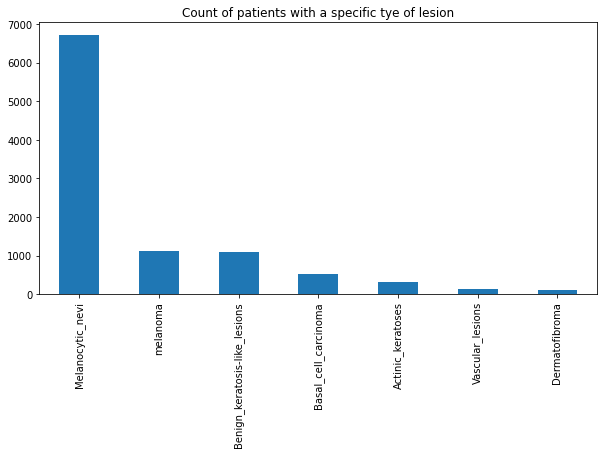

In [40]:
metadata["cell_type_idx"] = pd.Categorical(metadata["cell_type"]).codes

fig, ax1 = plt.subplots(1,1,figsize=(10,5))
metadata['cell_type'].value_counts().plot(kind='bar', ax= ax1, title="Count of patients with a specific tye of lesion")

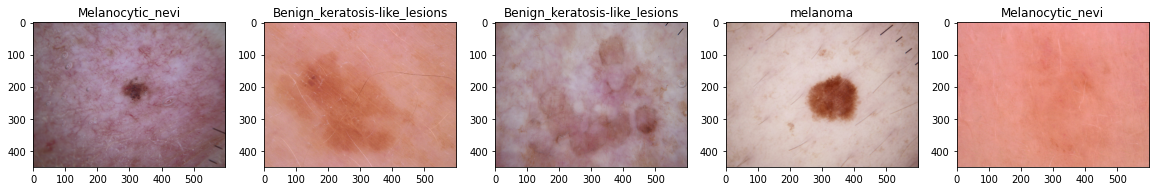

In [28]:
sample = metadata.sample(5)
images = sample['path']
types =  list(sample['cell_type'])

import skimage.io as ski

plt.figure(figsize=(20, 20))
for i, path in enumerate(images):
  image = ski.imread(path)
  plt.subplot(1, len(images), i+1)
  plt.imshow(image)
  plt.title(types[i])

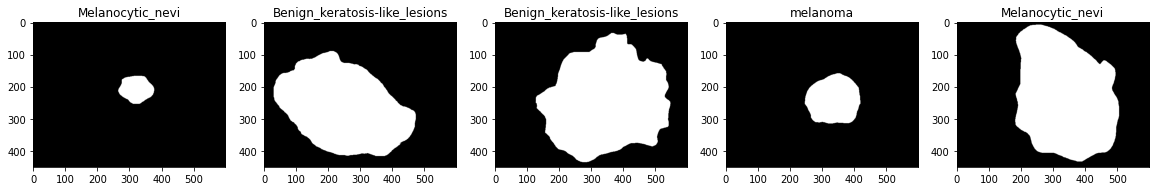

In [31]:
paths = list(images)
seg_paths = []
for path in paths:
  segmented = path.split('/')[-1].split('.')[0] + '_segmentation.png'
  segmented
  path = list(images)[0].split('/')[1:-2]
  path_n = ''
  for i in path:
    path_n = path_n + '/' + i
  path_n = path_n + '/img_segmented/segments/' + segmented
  seg_paths.append(path_n)

  
plt.figure(figsize=(20, 20))
for i, path in enumerate(seg_paths):
  image = ski.imread(path)
  plt.subplot(1, len(images), i+1)
  plt.imshow(image, cmap='gray')
  plt.title(types[i])

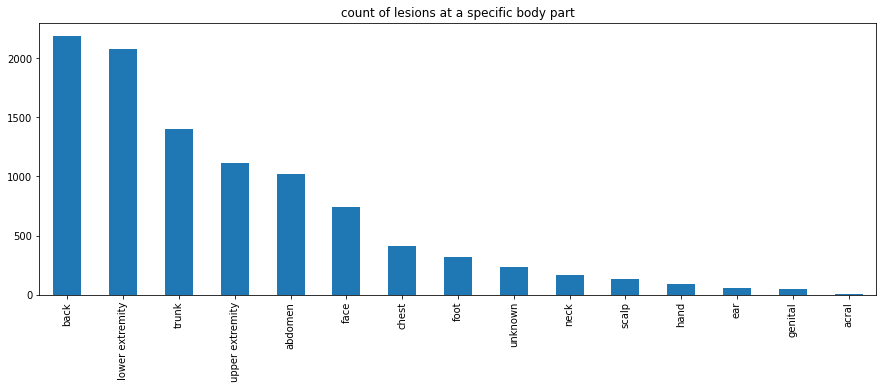

In [46]:
fig, ax2 = plt.subplots(1,1,figsize=(15,5))
metadata['localization'].value_counts().plot(kind='bar', ax= ax2, title="count of lesions at a specific body part")

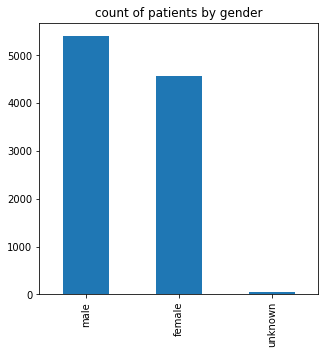

In [47]:
fig, ax3 = plt.subplots(1,1,figsize=(5,5))
metadata['sex'].value_counts().plot(kind='bar', ax= ax3, title="count of patients by gender")

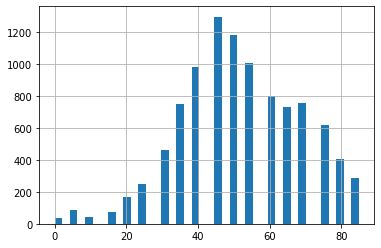

In [54]:
metadata['age'].hist(bins=40)

In [57]:
metadata['cell_type'].unique()

array(['Benign_keratosis-like_lesions', 'Melanocytic_nevi',
       'Dermatofibroma', 'melanoma', 'Vascular_lesions',
       'Basal_cell_carcinoma', 'Actinic_keratoses'], dtype=object)

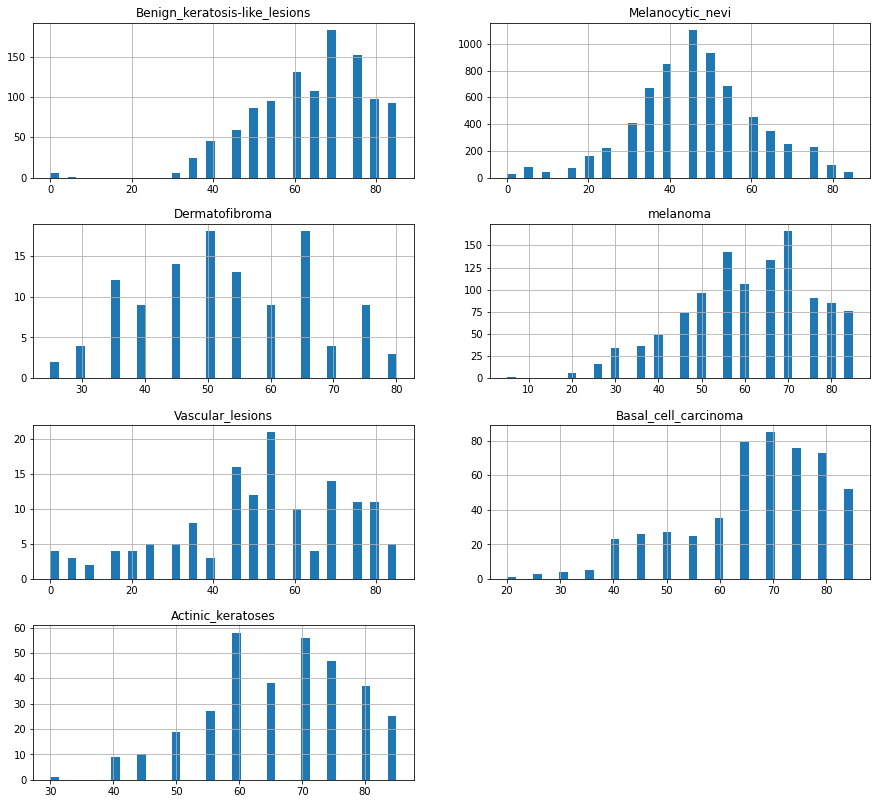

In [69]:
plt.figure(figsize=(15, 25))
fig.suptitle('Counts of patients with a specific lesion according to their age', fontsize=16)
for i, typ in enumerate(metadata['cell_type'].unique()):
  plt.subplot(len(metadata['cell_type'].unique()), 2, i+1)
  plt.title(typ)
  plt.subplots_adjust(hspace=0.3)
  metadata[metadata["cell_type"] == typ]["age"].hist(bins=40)

## Pre-processing

In [74]:
seg_path = '/content/drive/MyDrive/Research_Assistant/Skin_lesion/Data/img_segmented/segments/'

segid_path_dict = {filename.split('/')[-1].split('.')[0].split('_')[0] + '_' + filename.split('/')[-1].split('.')[0].split('_')[1]: filename
                     for filename in glob.glob(seg_path+'*')}

metadata["seg_path"] = metadata["image_id"].map(segid_path_dict.get)

In [88]:
data = metadata[['path', 'cell_type_idx', 'seg_path']]

In [89]:
data

,path,cell_type_idx,seg_path
0,/content/drive/MyDrive/Research_Assistant/Skin...,2,/content/drive/MyDrive/Research_Assistant/Skin...
1,/content/drive/MyDrive/Research_Assistant/Skin...,2,/content/drive/MyDrive/Research_Assistant/Skin...
2,/content/drive/MyDrive/Research_Assistant/Skin...,2,/content/drive/MyDrive/Research_Assistant/Skin...
3,/content/drive/MyDrive/Research_Assistant/Skin...,2,/content/drive/MyDrive/Research_Assistant/Skin...
4,/content/drive/MyDrive/Research_Assistant/Skin...,2,/content/drive/MyDrive/Research_Assistant/Skin...
...,...,...,...
10010,/content/drive/MyDrive/Research_Assistant/Skin...,0,/content/drive/MyDrive/Research_Assistant/Skin...
10011,/content/drive/MyDrive/Research_Assistant/Skin...,0,/content/drive/MyDrive/Research_Assistant/Skin...
10012,/content/drive/MyDrive/Research_Assistant/Skin...,0,/content/drive/MyDrive/Research_Assistant/Skin...
10013,/content/drive/MyDrive/Research_Assistant/Skin...,0,/content/drive/MyDrive/Research_Assistant/Skin...
